# 支持向量机原理

## 函数间隔

对于给定的训练数据集T和超平面（w,b）,定义超平面（w,b）关于样本$（x_i,y_i）$的函数间隔为：$$\overline{\gamma{_i}} = y_i(w\bullet{x_i} + b)$$

定义超平面（w,b）关于训练数据集T的函数间隔为超平面（w,b）关于T中所有样本点$（x_i,y_i）$的函数间隔之最小值：$$\overline{\gamma} = \min\limits_{i=1,...,N}\overline{y_i}$$

函数间隔可以表示分类预测的正确性及确信度，但是选择分离超平面时，只有函数间隔却是不够的

## 几何间隔

对于给定的训练数据集T和超平面（w,b）,定义超平面（w,b）关于样本点$（x_i,y_i）$的几何间隔为：$$\gamma{_i} = \frac{y_i(w\bullet{x_i} + b)}{||w||}$$

定义超平面（w,b）关于训练数据集T的集合间隔为超平面（w,b）关于T中所有样本点$（x_i,y_i）$的集合间隔之最小值：$$\gamma = \min\limits_{i=1,...,N}\gamma_i$$

## 函数间隔和集合间隔之间的关系

从上面函数间隔和几何间隔的定义，可以得到函数间隔和集合间隔之间的关系：$$\gamma_i = \frac{\overline{\gamma_i}}{||w||}$$

$$\gamma = \frac{\overline{\gamma}}{||w||}$$

## 硬间隔最大化分离超平面

支持向量机学习的基本想法是找到能够正确划分训练数据集并且几何间隔最大的分离超平面，换句话说也就是不仅将正负实例点分开，而且对最难分的实例点（离超平面最近的点）也有足够大的确信度将它们分开,硬间隔是与后面说明的软间隔相对应的

如何求得一个几何间隔最大化的分离超平面，可以表示为下面的约束优化问题：$$\max\limits_{w,b}\quad\gamma$$

$$s_.t.\quad\frac{y_i(w\bullet{x_i}+b)}{||w||}\geq\gamma,\quad{i=1,2,...,N}$$

根据上面函数间隔和几何间隔之间的关系，转换成下面的同等约束问题：$$\max\limits_{w,b}\quad\frac{\overline{\gamma}}{||w||}$$

$$s_.t.\quad\ y_i(w\bullet{x_i}+b)\geq\overline{\gamma},\quad{i=1,2,...,N}$$

由于当w,b按比例变换的的时候函数间隔$\overline\gamma$也会呈比例变化，先取$\overline\gamma= 1$,再由于$\frac{1}{||w||}$最大化和最小化$\frac{1}{2}{||w||}^2$是等价的，于是得到：$$\min\limits_{w,b}\quad\frac{1}{2}{||w||^2}$$

$$s_.t.\quad\ y_i(w\bullet{x_i}+b)\geq 1,\quad{i=1,2,...,N}$$

由此得到分离超平面：$$w^{*} \bullet x + b^{*} = 0$$

分类决策函数：$$f(x) = sign(w^{*} \bullet x + b^{*})$$

求解拉格朗日对偶函数：$$L(w,b,a) = \frac{1}{2}{||w||}^2 - \sum_{i=1}^na_i[(y_i(x_iw+b)-1)]----(1)$$ 
对w求偏导:$$\frac{\partial L}{\partial w} = w - \sum_{i=1}^na_iy_ix_i = 0-----(2)$$
对b求偏导:$$\frac{\partial L}{\partial b} = \sum_{i=1}^na_iy_i = 0-------(3)$$
将（2）（3）带入（1）得到：$$maxL(a) = -\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^na_ia_jy_iy_jx_ix_j + \sum_{i=1}^na_i$$
s.t. 
$$\sum_{i=1}^na_iy_i = 0$$
$$a_i >= 0$$

## 软间隔最大化

对于线性可分的数据集可以直接使用硬间隔最大化超平面进行划分，但对于线性不可分的某些样本点不能满足函数间隔大于等于1的约束条件，为了解决这个问题，可以对每个样本点$(x_i,y_i)$引进一个松弛变量$\xi >= 0$,使函数间隔加上松弛变量大于等于1，这样约束条件变为：$$yi(w\bullet x_i + b) >= 1- \xi_{i}$$

同时，对每个松弛变量$\xi_{i}$支付一个代价$\xi_{i},目标函数由原来的$$\frac{1}{2}{||w||}^2$$变为$$\frac{1}{2}{||w||}^2 + C\sum_{i=1}^n{\xi_i}$

C为惩罚系数，一般由应用问题决定，C值大时对误分类的惩罚增大，C值小时对误分类惩罚小

线性不可分的线性支持向量机的学习问题编程如下凸二次规划问题：$$\min\limits_{w,b,\xi}\quad\frac{1}{2}{||w||^2}+ C\sum_{i=1}^n{\xi_i}$$

$$s_.t.\quad\ y_i(w\bullet{x_i}+b)\geq 1 - \xi_{i},\quad{i=1,2,...,N}$$

$$\xi_{i} >= 0,\quad i = 1,2,...,N$$

由此得到分离超平面：$$w^{*} \bullet x + b^{*} = 0$$

分类决策函数：$$f(x) = sign(w^{*} \bullet x + b^{*})$$

拉格朗日对偶函数：
$$maxL(a) = -\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^na_ia_jy_iy_jx_ix_j + \sum_{i=1}^na_i$$
s.t. 
$$\sum_{i=1}^na_iy_i = 0$$
$$a_i >= 0$$
$$\mu_i >= 0$$
$$C-a_i-\mu_i = 0$$

## 核技巧在支持向量机中的应用

注意到在线性支持向量机的对偶问题中，无论是目标函数还是决策函数都只涉及输入实例与实例之间的内积，在对偶问题的目标函数中的内积$x_ix_j$可以用核函数$$K(x_i,x_j) = \phi (x_i)\bullet \phi(x_j)$$代替，此时对偶问题的目标函数成为$$maxL(a) = -\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^na_ia_jy_iy_jK(x_i,x_j) + \sum_{i=1}^na_i$$

同样，分类决策函数中的内积也可以用核函数代替$$f(x) = sign(\sum_{i=1}^na_i^*y_iK(x_i,x)+b^*)$$

# 使用sklearn框架训练svm

- SVM特别适用于小型复杂数据集，samples < 100k
- 硬间隔分类有两个主要的问题：
    - (1) 必须要线性可分
    - (2) 对异常值特别敏感，会导致不能很好的泛化或无法找不出硬间隔
- 使用软间隔分类可以解决硬间隔分类的两个主要问题，尽可能保存街道宽敞和限制间隔违例(即位于街道之上，甚至在错误一边的实例)之间找到良好的平衡
- 在Sklean的SVM类中，可以通过超参数C来控制这个平衡，C值越小，则街道越宽，但是违例会越多，如果SVM模型过度拟合，可以试试通过降低C来进行正则化

## 线性可分LinearSVC类

### LinearSVC类重要参数说明

<ul>
    <li><b>penalty</b>: string,'l1'or'l2',default='l2'</li>
    <li><b>loss</b>: string 'hing'or'squared_hinge',default='squared_hinge',hinge为标准的SVM损失函数</li>
    <li><b>dual</b>: bool,defalut=True,wen n_samples > n_features,dual=False，SVM的原始问题和对偶问题二者解相同</li>
    <li><b>tol</b>: float,deafult=le-4,用于提前停止标准</li>
    <li><b>C</b>: float,defult=1.0,为松弛变量de 惩罚系数</li>
    <li><b>multi_class</b>: 默认为ovr，该参数不用修改</li>
    <li>更多说明应查看源码</li>
</ul>

### Hinge损失函数

    函数max(0,1-t),当t>=1时，函数等于0，如果t<1，其导数为-1

In [9]:
def hinge(x):
    if x >=1 :
        return 0
    else:
        return 1-x

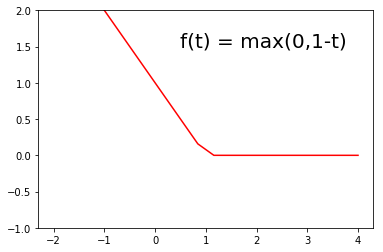

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,4,20)
y = [hinge(i) for i in x ]
ax = plt.subplot(111)
plt.ylim([-1,2])
ax.plot(x,y,'r-')
plt.text(0.5,1.5,r'f(t) = max(0,1-t)',fontsize=20)
plt.show()

### 测试LinearSVC

In [31]:
from sklearn import datasets
import pandas as pd

In [51]:
iris = datasets.load_iris()
print(iris.keys())
print('labels:',iris['target_names'])
features,labels = iris['data'],iris['target']
print(features.shape,labels.shape)

# 分析数据集
print('-------feature_names:',iris['feature_names'])
iris_df = pd.DataFrame(features)
print('-------info:',iris_df.info())
print('--------descibe:',iris_df.describe())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
labels: ['setosa' 'versicolor' 'virginica']
(150, 4) (150,)
-------feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB
-------info: None
--------descibe:                 0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.9

In [52]:
# 数据进行预处理
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV

# 对数据进行标准化
scaler = StandardScaler()
X = scaler.fit_transform(features)
print(X.mean(axis=0))
print(X.std(axis=0))
# 对标签进行编码
encoder = LabelEncoder()
Y = encoder.fit_transform(labels)

# 调参

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]
